# FISCAL SPONSOR
**2024 Tidytuesday  Week 11**

## Setup

### Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Fonts and Params

In [18]:
from matplotlib import rcParams
from matplotlib import font_manager

font_dirs =  ['/Library/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

rcParams['font.family'] = 'Roboto'
#rcParams['font.size'] = '12'

###  Data

In [5]:
import os
#os.getcwd()

In [7]:
dfr = pd.read_csv('fiscal_data_w10.csv')
dfr.head()

,name,created,acted,total,fee,percent,project,services,model,defintion
0,1st Note Music Foundation,2012,2012,2,We charge a 7% administrative fee for most gra...,7.00,Arts and culture,Auditing,Model C,Preapproved Grant Relationship
1,"50CAN, Inc.",2011,2016,10,Between 7.5% and 15%,11.25,Education,Auditing,Model A,Direct Project
2,"50CAN, Inc.",2011,2016,10,Between 7.5% and 15%,11.25,Education,Auditing,Model B,Independent Contractor Project
3,"50CAN, Inc.",2011,2016,10,Between 7.5% and 15%,11.25,Education,Auditing,Model C,Preapproved Grant Relationship
4,"50CAN, Inc.",2011,2016,10,Between 7.5% and 15%,11.25,Education,Bill paying,Model A,Direct Project


## Data Wrangling

In [24]:
by_services = dfr['services'].value_counts()
by_services_sorted = dfr['services'].value_counts().reset_index().sort_values('count', ascending=False)
by_services_sorted.head(3)

,services,count
0,Org/Prog Development,4671
1,Bookkeeping,4572
2,Bill paying,3961


## Data Viz

<Axes: ylabel='services'>

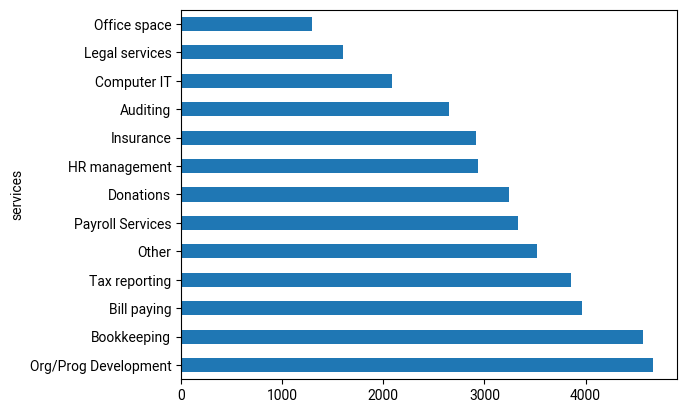

In [20]:
by_services.plot(kind  = 'barh')

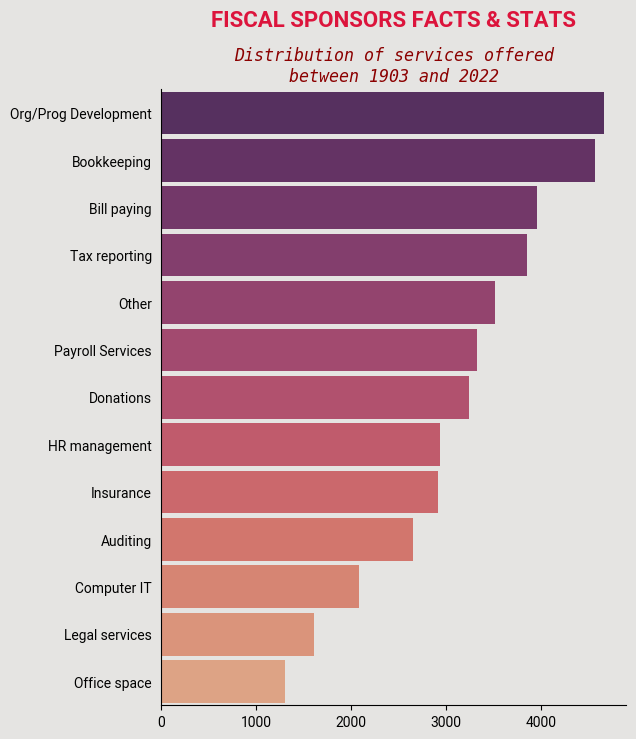

In [62]:
fig, ax = plt.subplots(1, 1, num=1, figsize=(6, 8),  facecolor="#E5E4E2")
mid = (fig.subplotpars.right + fig.subplotpars.left)/2

services = by_services_sorted["services"]
cnt = by_services_sorted["count"]

palette = sns.color_palette("flare", n_colors=len(services))
palette.reverse()

sns.barplot(x=cnt, y=services,
            hue=services,
            palette=palette,
            width=0.9,
            ax=ax)

ax.set_facecolor("#E5E4E2")


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.suptitle('FISCAL SPONSORS FACTS & STATS', size=16, x=mid, color = 'crimson', weight='bold') # or fontweight

titlefont = {'family':'monospace', 'color':'darkred', 'size':12,}
ax.set_title(
    'Distribution of services offered\nbetween 1903 and 2022',
    fontdict  = titlefont,
    style='italic')

ax.set_xlabel(""), ax.set_ylabel("")
plt.tick_params(axis='y',  which='both',  left=False,  labelbottom=True)

plt.show()